In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [73]:
df = pd.read_csv("../data/polynomial+regression.csv" ,sep=";")
df

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200
5,150,220
6,200,240
7,250,240
8,300,300
9,400,350


In [74]:
x = df.araba_fiyat.values.reshape(-1,1)
y = df.araba_max_hiz.values.reshape(-1,1)

<function matplotlib.pyplot.show(close=None, block=None)>

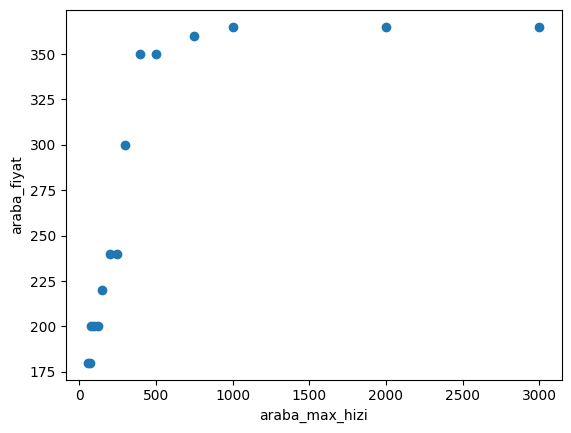

In [75]:
plt.scatter(x,y)
plt.xlabel("araba_max_hizi")
plt.ylabel("araba_fiyat")
plt.show

In [76]:
# linear regression y = b0 + b1x
# multiple linear regression y = b0 + b1x + b2x

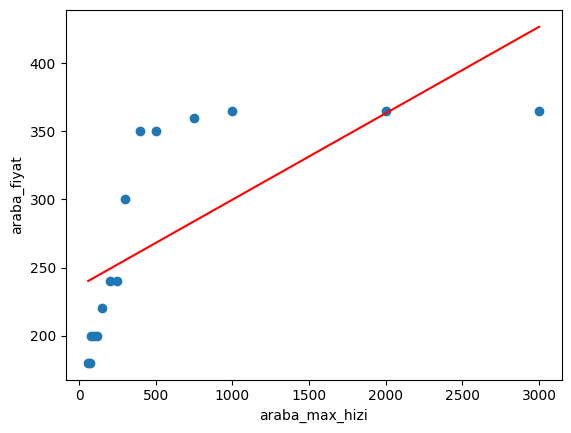

In [77]:
plt.scatter(x,y)
plt.xlabel("araba_max_hizi")
plt.ylabel("araba_fiyat")
plt.show

lr = LinearRegression()
lr.fit(x,y)

# predict
y_head = lr.predict(x)
y_head

plt.plot(x,y_head,color='red', label = "linear")


In [78]:
lr.predict([[10000]]) # 10000000 tl'lik araba hızı tahmini.

array([[871.66401826]])

Bu veri tahminlemesi sonucunda hız uçak hızında çıktı, sonuca göre bu veri setinin linear regression modeline uygun olmadığı düşünüldü.

Normal bi şekilde fit edilebilmesi için:

    polynomial linear regression y = b0 + b1x + b2x^2 + b3x^3 + ... + bnx^n


<img src="../img/4.png" width="750" height="300"> 

In [79]:
from sklearn.preprocessing import PolynomialFeatures

In [80]:
polynmial_regression = PolynomialFeatures(degree = 2)

In [85]:
x_polynomial = polynmial_regression.fit_transform(x) # polynomial regression kullan x 'i 2. dereceden polynomial feature olarak çevir.
x_polynomial

array([[1.000e+00, 6.000e+01, 3.600e+03],
       [1.000e+00, 7.000e+01, 4.900e+03],
       [1.000e+00, 8.000e+01, 6.400e+03],
       [1.000e+00, 1.000e+02, 1.000e+04],
       [1.000e+00, 1.200e+02, 1.440e+04],
       [1.000e+00, 1.500e+02, 2.250e+04],
       [1.000e+00, 2.000e+02, 4.000e+04],
       [1.000e+00, 2.500e+02, 6.250e+04],
       [1.000e+00, 3.000e+02, 9.000e+04],
       [1.000e+00, 4.000e+02, 1.600e+05],
       [1.000e+00, 5.000e+02, 2.500e+05],
       [1.000e+00, 7.500e+02, 5.625e+05],
       [1.000e+00, 1.000e+03, 1.000e+06],
       [1.000e+00, 2.000e+03, 4.000e+06],
       [1.000e+00, 3.000e+03, 9.000e+06]])

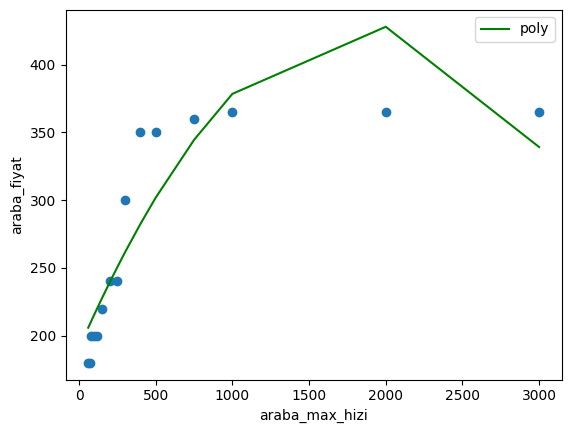

In [83]:
plt.scatter(x,y)
plt.xlabel("araba_max_hizi")
plt.ylabel("araba_fiyat")
plt.show

lr = LinearRegression()
lr.fit(x,y)

x_polynomial = polynmial_regression.fit_transform(x) # polynomial regression kullan x 'i 2. dereceden polynomial feature olarak çevir.
x_polynomial

# fit
linear_regression2 = LinearRegression()
linear_regression2.fit(x_polynomial,y)

y_head2 = linear_regression2.predict(x_polynomial)

plt.plot(x,y_head2, color="green", label = "poly")
plt.legend()
plt.show()